# 1.Introduction

In this tutorial, we will learn about different methods to `wrangle` and `visualize` geospatial data, or data with a geographic location.

Along the way, you'll offer solutions to several real-world problems like:

- Where should a global non-profit expand its reach in remote areas of the Philippines?
- How do purple martins, a threatened bird species, travel between North and South America? Are the birds travelling to conservation areas?
- Which areas of Japan could potentially benefit from extra earthquake reinforcement?
- Which Starbucks stores in California are strong candidates for the next Starbucks Reserve Roastery location?
- Does New York City have sufficient hospitals to respond to motor vehicle collisions? Which areas of the city have gaps in coverage?

You'll also visualize crime in the city of Boston, examine health facilities in Ghana, explore top universities in Europe, and track releases of toxic chemicals in the United States.

In this first tutorial, we'll quickly cover the pre-requisites that you'll need to complete this micro-course. And, if you'd like to review more deeply, we recommend the Pandas micro-course.

We'll also get started with visualizing our first geospatial dataset!

## 1.1 Reading geo data

There are many different geospatial file formats, such as `shapefile, GeoJSON, KML, and GPKG`. We won't discuss their differences in this micro-course, but it's important to mention that:

- `shapefile` is the most common file type that you'll encounter, and
- We will use **geopandas** liberary to load these geospatial data with the `gpd.read_file()` function.

In [1]:
import geopandas as gpd

In [11]:
# note in DEC_lands you can find 9 files with different extensions.
# They are required for the .shp can be read correctly by geopandas
root_dir="/home/pliu/data_set/kaggle/geospatial/L01"
file_path=f"{root_dir}/DEC_lands/DEC_lands.shp"

In [12]:
# Read in the data
full_data = gpd.read_file(file_path)

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


As you can see in the "CLASS" column, each of the first five rows corresponds to a different forest.

For the rest of this tutorial, consider a scenario where you'd like to use this data to plan a weekend camping trip. Instead of relying on crowd-sourced reviews online, you decide to create your own map. This way, you can tailor the trip to your specific interests.

## 1.2 Prerequisites

The GeoDataFrame object which is loaded via **GeoPandas** can use all functions that are available for **Pandas DataFrame**.

In [4]:
# check the type of geo dataframe
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
# For instance, we can select a subset of the colum.
sub_df = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

We use the `value_counts()` method to see a list of different land types, along with how many times they appear in the dataset.

In [6]:
# .CLASS returns the column
# .values_counts() returns the value name and their count, like a groupBy
sub_df.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

You can also use loc (and iloc) and isin to select subsets of the data.

In [7]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
# like filter(col() isin [])
wild_lands = sub_df.loc[sub_df.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


## 1.3 Create your first map!

We can quickly visualize the data with the plot() method.

<AxesSubplot: >

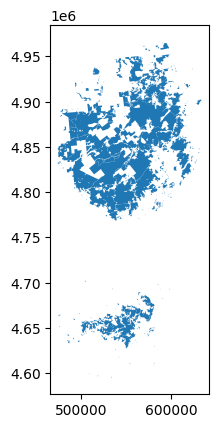

In [9]:
wild_lands.plot()

Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [10]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

The **geometry** column can contain below datatypes
 - **Point**,
 - **LineString**,
 - **Polygon**.

![geometry_col_dtype.png](../image/geometry_col_dtype.png)

The `geometry` column in our dataset contains 2983 different `Polygon objects`, each corresponding to a different shape in the plot above.

In the code cell below, we create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

In [14]:
# Campsites in New York state (Point)
poi_file_path=f"{root_dir}/DEC_pointsinterest/DECptsofinterest.shp"
POI_data = gpd.read_file(poi_file_path)
camp_sites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

camp_sites.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,DESCRIP,REGION,OFFICE,UPDATED,ASSET_UID,ACCESSIBLE,geometry
17,45926,LEWIS 03,SAND FLATS STATE FOREST,CAMPSITE,PRIMITIVE CAMPSITE,None,6,LOWVILLE,2012-07-10,5224,N,POINT (476670.846 4822486.067)
140,50104,LEWIS 35,INDEPENDENCE RIVER STATE FOREST,CAMPSITE,PRIMITIVE CAMPSITE,None,6,LOWVILLE,2012-12-11,5074,N,POINT (473053.056 4843730.135)
141,50105,LEWIS 35,INDEPENDENCE RIVER STATE FOREST,CAMPSITE,PRIMITIVE CAMPSITE,None,6,LOWVILLE,2012-12-11,5075,N,POINT (473216.276 4843873.676)
251,51512,MADISON 12,BEAVER CREEK STATE FOREST,ORCHARD CAMPSITE,PRIMITIVE CAMPSITE,CAMPSITE WITH 2 CAR CAPACITY,7,SHERBURNE,2013-03-27,12012,N,POINT (475802.767 4744654.267)
257,51554,MADISON 01,CHARLES E. BAKER STATE FOREST,FIRETOWER CAMPSITE #1,PRIMITIVE CAMPSITE,PRIMITIVE CAMPSITE,7,SHERBURNE,2013-03-27,12048,N,POINT (468356.764 4734825.423)


In [15]:
# Foot trails in New York state (LineString)
roads_trails_path=f"{root_dir}/DEC_roadstrails/Decroadstrails.shp"
roads_trails = gpd.read_file(roads_trails_path)
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

trails.head()

,OBJECTID,UNIT,FACILITY,NAME,ASSET,ATV,FOOT,HORSE,BIKE,XC,...,MAPPWD,DESCRIP,ROAD_CLASS,UPDATED,REGION,OFFICE,MARKER,TRANS_UID,SHAPE_LEN,geometry
31,304,AFP,DEBAR MOUNTAIN WILD FOREST,MAIN BRANCH CANOE CARRY,FOOT TRAIL,N,M,N,N,N,...,N,None,RT,2006-08-24,5,RAY BROOK,None,244.776100,246.427662,"LINESTRING (542463.277 4933622.421, 542429.239..."
34,311,AFP,DEBAR MOUNTAIN WILD FOREST,CAMP SITE ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,163.203974,163.203974,"LINESTRING (564033.375 4922561.921, 564100.343..."
35,312,AFP,DEBAR MOUNTAIN WILD FOREST,ACCESS TRAIL,FOOT TRAIL,N,Y,N,N,N,...,N,None,RT,2011-04-19,5,RAY BROOK,None,117.720119,117.720119,"LINESTRING (564202.360 4922745.700, 564298.863..."
37,314,AFP,DEBAR MOUNTAIN WILD FOREST,EAST BRANCH CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2006-08-24,5,RAY BROOK,None,386.073522,386.073522,"LINESTRING (547547.421 4942827.828, 547629.172..."
38,317,AFP,DEBAR MOUNTAIN WILD FOREST,RAINBOW LAKE TO JONES POND CANOE CARRY,FOOT TRAIL,N,Y,N,N,Y,...,N,None,RT,2011-04-19,5,RAY BROOK,None,127.460965,127.460965,"LINESTRING (564759.838 4923577.416, 564654.630..."


In [17]:
# County boundaries in New York state (Polygon)
counties_path=f"{root_dir}/NY_county_boundaries/NY_county_boundaries.shp"
counties = gpd.read_file(counties_path)
counties.head(5)

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((522686.116 4977770.435, 522785.820 4..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((576869.554 4981194.984, 576661.323 4..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((576869.554 4981194.984, 577209.259 4..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((622025.362 4932488.545, 621958.049 4..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((431513.316 4917024.860, 433126.724 4..."


Next, we create a map from all four GeoDataFrames.

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<AxesSubplot: >

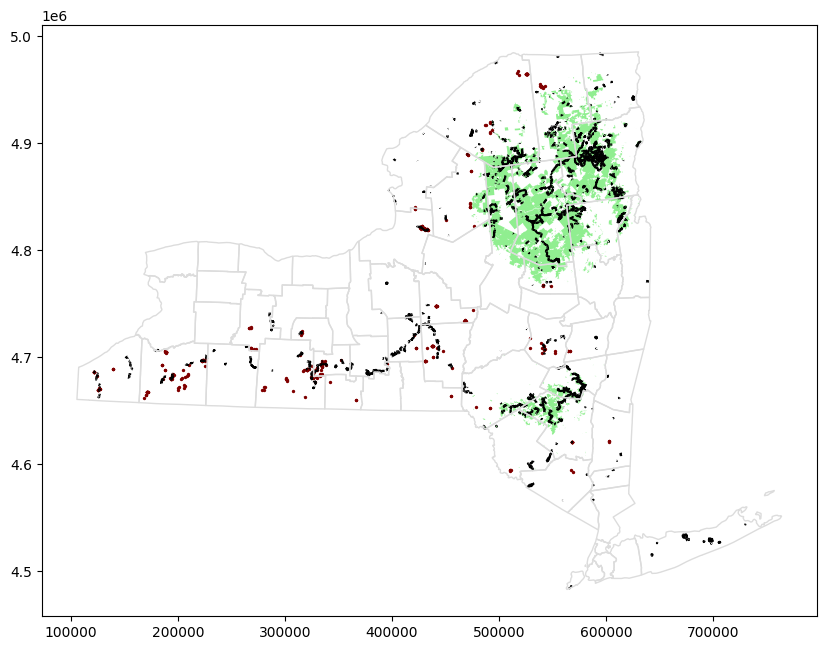

In [19]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
camp_sites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)